In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
##from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [2]:
# bell states are important and there are 4 of them 

#1. 
from  qiskit.quantum_info import Statevector

bell_0 = QuantumCircuit(2)
bell_0.h(0)
bell_0.cx(0, 1)

# used the .from_label(), we could also use .from_int(), for more check the docs
sv = Statevector.from_label('00')
# evolve this initial state through our circuit
sv_ev = sv.evolve(bell_0)
#print out the state using LaTeX
sv_ev.draw('latex')

<IPython.core.display.Latex object>

In [3]:
bell_1 = QuantumCircuit(2)
bell_1.h(0)
bell_1.z(0)
bell_1.cx(0,1)

sv_ev2 = sv.evolve(bell_1)
sv_ev2.draw('latex')

<IPython.core.display.Latex object>

In [4]:
  
bell_2 = QuantumCircuit(2)
bell_2.h(0)
bell_2.x(1)
bell_2.cx(0,1)

sv_ev_2 = sv.evolve(bell_2)
sv_ev_2.draw('latex')

<IPython.core.display.Latex object>

In [5]:
bell_3 = QuantumCircuit(2)
bell_3.h(0)
bell_3.x(1)
bell_3.cx(0,1)
bell_3.z(1)

sv_ev_3 = sv.evolve(bell_3)
sv_ev_3.draw('latex')

<IPython.core.display.Latex object>

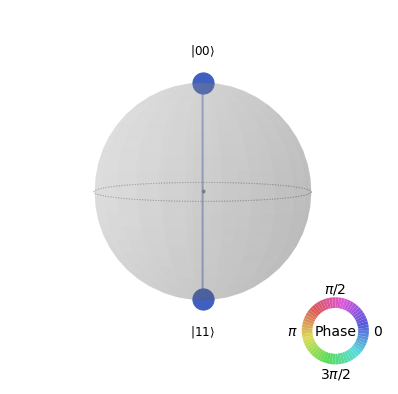

In [6]:
# Statevector object can be drawn directly onto qsphere
# instead of .draw(latex), just use .draw(qsphere)
# HOWEVER this wont work once simulating statevecs from simulators
sv_ev.draw("qsphere")

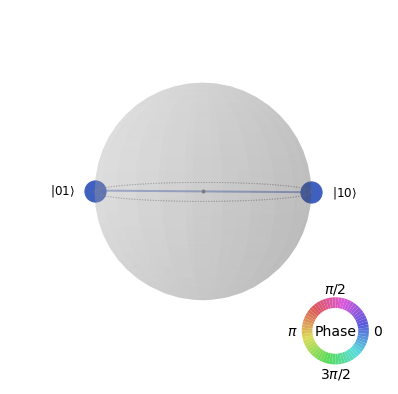

In [7]:
sv_ev_2.draw("qsphere")

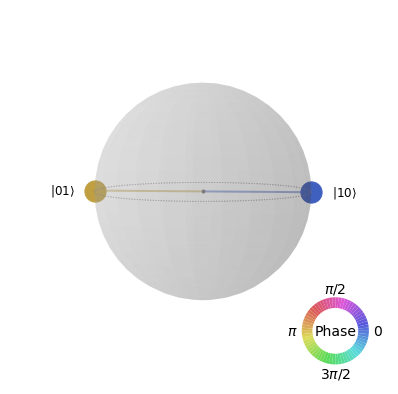

In [8]:
sv_ev_3.draw("qsphere")

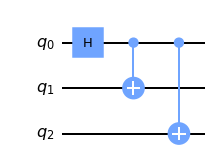

In [9]:
# GHZ (Greenberger, Horne and Zeilinger circuit)
# generates 3 or more maximally entangled quantum states
ghz = QuantumCircuit(3)
ghz.h(0)
# didn't need to specify 2x ghz
ghz.cx([0, 0], [1, 2])
ghz.draw('mpl')

In [10]:
sv = Statevector.from_int(0, 2**3)
# passes the sv statevector state through the ghz circuit
sv_ev = sv.evolve(ghz)
sv_ev.draw('latex')

<IPython.core.display.Latex object>

In [11]:
sv = Statevector.from_label('000')
sv_ev = sv.evolve(ghz)
sv_ev.draw('latex')

<IPython.core.display.Latex object>

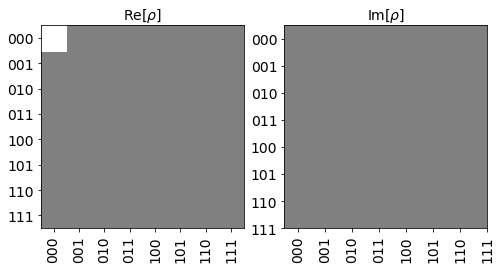

In [12]:
# hinton is like a birds eye view of the state city representation
sv.draw('hinton')

In [13]:
# drawing from a Statevector object is fine, but simulating is cooler
# BasicAer has the 3 simluators to use
# 1-"qasm_simulator"
# 2-"statevector_simulator"
# 3-"unitary_simulator"
BasicAer.backends()

[<QasmSimulatorPy('qasm_simulator')>,
 <StatevectorSimulatorPy('statevector_simulator')>,
 <UnitarySimulatorPy('unitary_simulator')>]

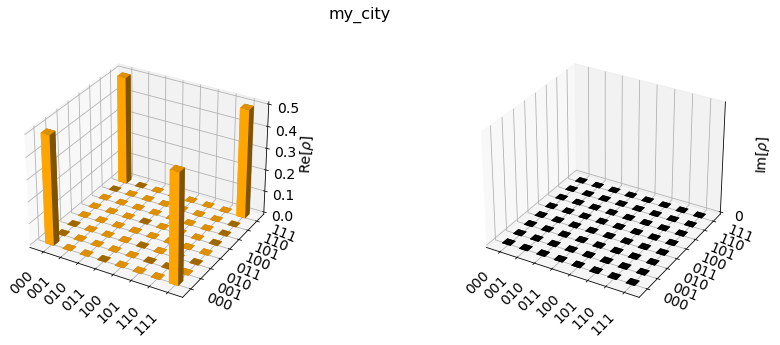

In [14]:
backend_sv = BasicAer.get_backend("statevector_simulator")
job = execute(ghz, backend_sv, shots = 1024)
result = job.result()
sv_ev2 = result.get_statevector(ghz)
# NOTE: did not measure or plot the state in any way
# There are multiple ways to to visualize a state

# 1. Density Matrix (state _city)

plot_state_city(sv_ev2, title = "my_city", color = ["orange", "black"])

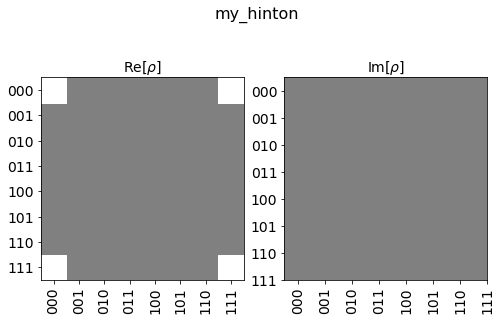

In [15]:
# 2. 2D version of above plot
plot_state_hinton(sv_ev2, title = "my_hinton")

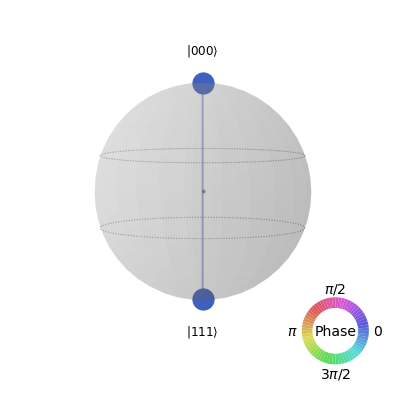

In [16]:
# 3. Qsphere
plot_state_qsphere(sv_ev2)

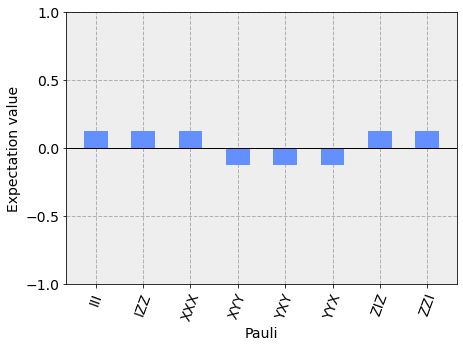

In [17]:
# 4. Plots Pauli Expectation Values (PEV)
plot_state_paulivec(sv_ev2)

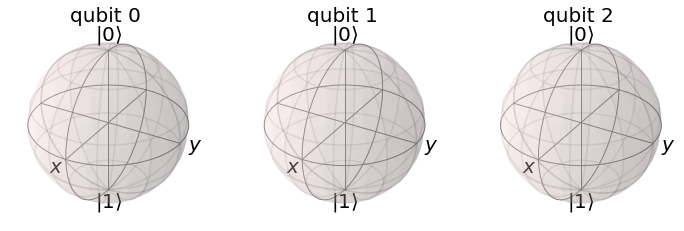

In [18]:
# 5. Plot the Bloch Vector
plot_bloch_multivector(sv_ev2)
# since they are in maximally entangled state, the vectors cannot be seen

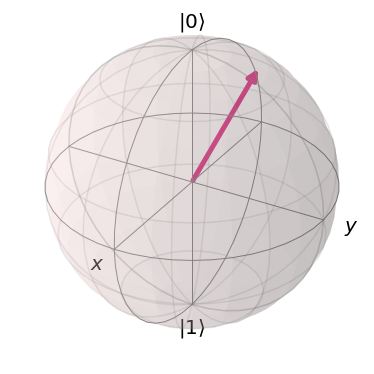

In [19]:
# NOTE: important distinction between Bloch Vector and Bloch MULTIvector
# the multivector plots a state coming from a circuit
# while a bloch_vector needs specifications of the coordinates
# NOTE: Coords can be cartesian or spherical - CHECK DOCS
plot_bloch_vector([0,0.5,1])

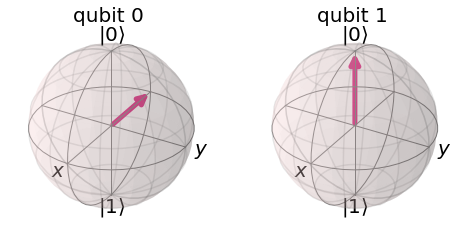

In [20]:
# CIRCUITS WITH EXPLICIT QUANTUM REGISTERS

# here we make 2 registers explicitly before creating our circuit
# and we get the statevector the same way
# then we plot its bloch multivector

q_a = QuantumRegister(1, 'q_a')
q_b = QuantumRegister(1, 'q_b')
qc = QuantumCircuit(q_a, q_b)
qc.h(0)
qc.z(0)

back = BasicAer.get_backend('statevector_simulator')
result = execute(qc, back).result()
sv = result.get_statevector()
plot_bloch_multivector(sv)

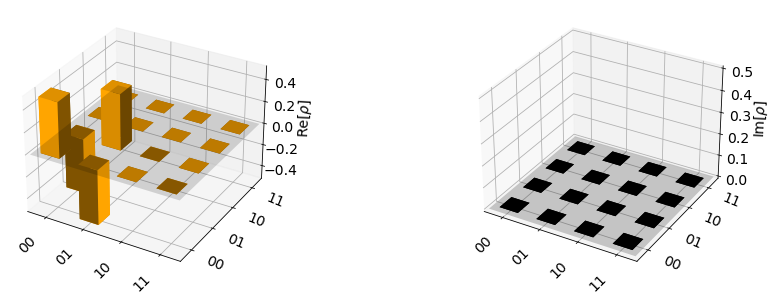

In [21]:
plot_state_city(sv, color = ["orange", "black"])

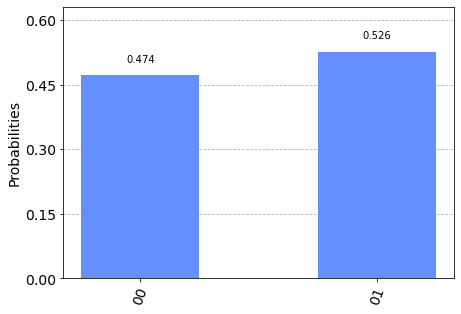

In [22]:
# Lets do an actual experiment, running it through the qasm simulator
# The following CREATES a classical registter for a circuit that doesnt have one
# Means that if circuit already has a classical register, it will CREATE ANOTHER ONE
# so its used for quick sims like this one
qc.measure_all()

qasm_sim = BasicAer.get_backend("qasm_simulator")
# we can skip some steps by doing .result() directly
result = execute(qc, qasm_sim).result()
# now we are getting the counts instead of the states (quantifiable counts of the experiment)
counts = result.get_counts()
plot_histogram(counts)

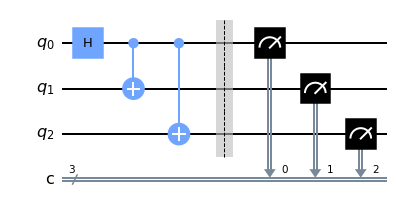

In [23]:
# Extend a predefined circuit with "compose"
meas = QuantumCircuit(3, 3)
meas.barrier()
meas.measure([0, 1, 2], [0, 1, 2])
# ensures, the ghz circuit is inserted right before this circuit (it goes at the front)
circ = meas.compose(ghz, range(3), front = True)
circ.draw("mpl")

In [24]:
backend = BasicAer.get_backend("qasm_simulator")
circ = transpile(circ, backend)
job = backend.run(circ, shots = 1024)
counts = result.get_counts()
print(counts)

{'00': 485, '01': 539}


In [25]:
job2 = execute(circ, backend, shots = 1024)
result2 = job2.result()
counts2 = result2.get_counts()
print(counts2)

{'111': 504, '000': 520}


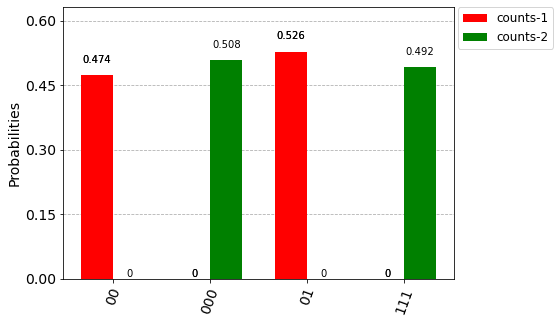

In [26]:
leg = ['counts-1', 'counts-2']
plot_histogram([counts, counts2], legend = leg, sort = "asc", color = ["red", "green"])

In [27]:
# can also work on real backend provider and check the job
import qiskit.tools.jupyter
# this creates a pop up of the jobs
%qiskit_job_watcher 

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [ ]:
from qiskit.tools import job_monitor
# to use a real computer, say provider instead of BasicAer
quito = provider.get_backend("ibmq_quito")
job = execute(circ, quito)
job_monitor(job)

Job Status: job is queued (298)   

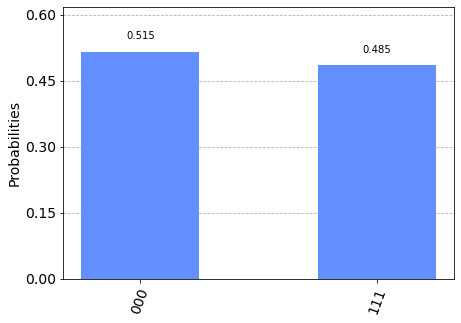

In [28]:
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [29]:
# we can also turn circuits into custom operators
from qiskit.quantum_info import Operator
U = Operator(ghz) 
U.data
# Similar to getting the statevector of an object but gets
# for the operator instead
# We can also do this through a simulation as well, just like for the state!

array([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.70710678+0.j, -0.70710678+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j,  0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
        -0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.      

In [30]:
# can round by using np.around(<insert matrix here>, <insert desired number of decimals here>)
np.around(U.data, 3)

array([[ 0.707+0.j,  0.707+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.707+0.j, -0.707+0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707+0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
        -0.707+0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
         0.707+0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.707+0.j,  0.707+0.j],
       [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j]])

In [31]:
# can do the same with a unitary_sim, just like the statevector_sim
backend_uni = BasicAer.get_backend("unitary_simulator")
# can skip a bunch of steps
U = execute(ghz, backend_uni).result().get_unitary(decimals = 3)
U

array([[ 0.707+0.j,  0.707-0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.707+0.j, -0.707+0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707-0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
        -0.707+0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
         0.707-0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.707+0.j,  0.707-0.j],
       [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j]])

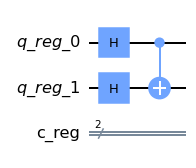

In [32]:
# Creating a circuit with quantum and clasic registers explicitly
q = QuantumRegister(2, "q_reg")
c = ClassicalRegister(2, "c_reg")
qc = QuantumCircuit(q, c)
qc.h(q[0:2])
qc.cx(q[0], q[1])
qc.draw("mpl")

In [33]:
U_bell = Operator(qc)
np.around(U_bell.data, 3)

array([[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j],
       [ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j],
       [ 0.5+0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j],
       [ 0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j]])

In [34]:
back = BasicAer.get_backend("unitary_simulator")
result = execute(qc, back).result()
U = result.get_unitary(decimals = 3)
U

array([[ 0.5+0.j,  0.5-0.j,  0.5-0.j,  0.5-0.j],
       [ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5-0.j],
       [ 0.5+0.j,  0.5-0.j, -0.5+0.j, -0.5+0.j],
       [ 0.5+0.j, -0.5+0.j,  0.5-0.j, -0.5+0.j]])

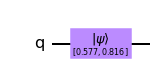

In [35]:
# testing for fidelity with initializer
# can define a state ourselves
a = 1/np.sqrt(3)
desired_state = [a, np.sqrt(1-a**2)]
q_reg = QuantumRegister(1, 'q')
qc = QuantumCircuit(q_reg)
qc.initialize(desired_state, 0)
qc.draw("mpl")

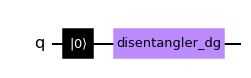

In [36]:
# there is also decomposing
decomp = qc.decompose()
decomp.draw("mpl")

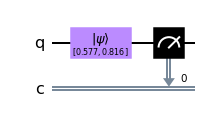

In [37]:
c_reg = ClassicalRegister(1, 'c')
meas = QuantumCircuit(q_reg, c_reg)
meas.measure(0, 0)
circ = meas.compose(qc, range(1), front = True)
circ.draw("mpl")

In [38]:
# squaring the amps
alpha_squared = .577 ** 2
beta_squared = .816 ** 2
print(alpha_squared, beta_squared)

0.332929 0.6658559999999999


In [39]:
# Can compare fidelities of the state created and state we wanted
back = BasicAer.get_backend("qasm_simulator")
job = execute(circ, back, shots = 1000)
counts = job.result().get_counts()
print(counts)

{'0': 333, '1': 667}


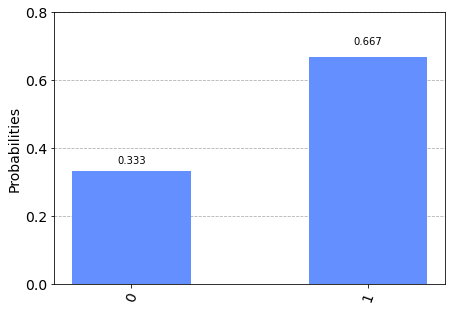

In [40]:
plot_histogram(counts)

In [41]:
# getting the statevector from the circuit
back_sv = BasicAer.get_backend("statevector_simulator")
result = execute(qc, back_sv).result()
qc_sv = result.get_statevector(qc)
qc_sv

array([0.57735027+0.j, 0.81649658+0.j])

In [42]:
from qiskit.quantum_info import state_fidelity
# compares the SV from sim to the state we want
state_fidelity(desired_state, qc_sv)

1.0

In [43]:
from qiskit.circuit.library import XGate
from qiskit.quantum_info import Operator, average_gate_fidelity, process_fidelity
op_a = Operator(XGate())
op_b = np.exp(1j / 2) * op_a
a = average_gate_fidelity(op_a, op_b)
a

1.0

In [44]:
b = process_fidelity(op_a, op_b)
a == b

True

In [45]:
back_uni = BasicAer.get_backend("unitary_simulator")
job = execute(qc, back_uni)
result = job.result()
U_qc = result.get_unitary(decimals = 3)
U_qc

array([[ 0.577+0.j, -0.816+0.j],
       [ 0.816+0.j,  0.577+0.j]])

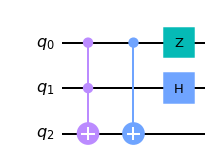

In [46]:
qc = QuantumCircuit(3)
qc.mct([0, 1], 2)
qc.cx(0, 2)
qc.h(1)
qc.z(0)
qc.draw("mpl")

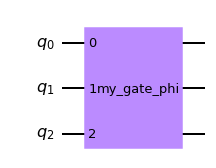

In [47]:
qc_gate = qc.to_gate()
qc_gate.name = "my_gate_phi"
circ = QuantumCircuit(3)
circ.append(qc_gate, [0, 1, 2])
circ.draw("mpl")

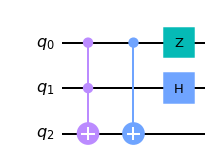

In [48]:
circ_decomp = circ.decompose()
circ_decomp.draw("mpl")

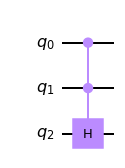

In [49]:
from qiskit.circuit.library import HGate
ch = HGate().control(2)
qc = QuantumCircuit(3)
qc.append(ch, [0, 1, 2])
qc.draw("mpl")

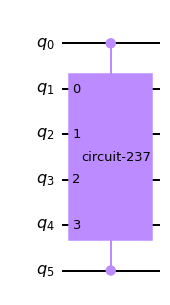

In [50]:
circ = QuantumCircuit(4)
circ.h(range(2))
circ.cx(0, 1)
circ.cx(0, 3)
circ.crz(np.pi/2, 0, 2)

my_gate = circ.to_gate().control(2)
qc = QuantumCircuit(6)
qc.append(my_gate, [0, 5, 1, 2, 3, 4])
qc.draw("mpl")

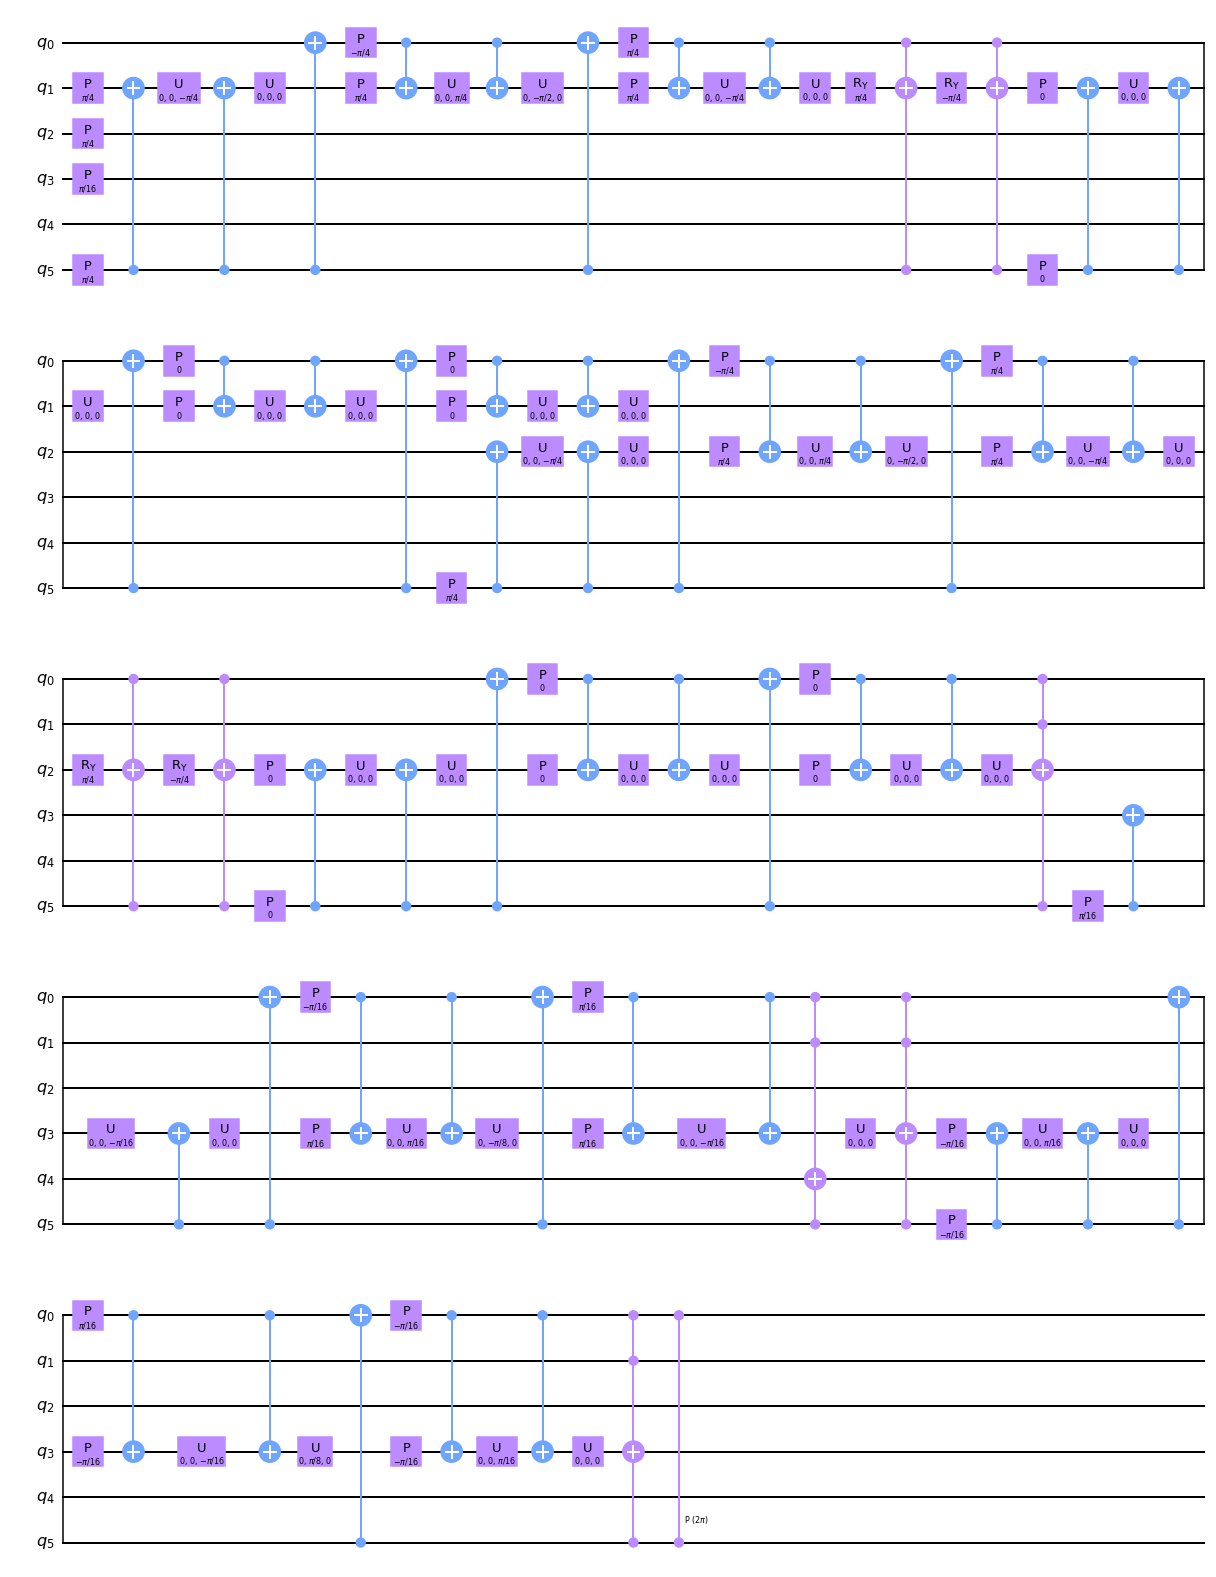

In [51]:
circ  =qc.decompose()
circ.draw("mpl")

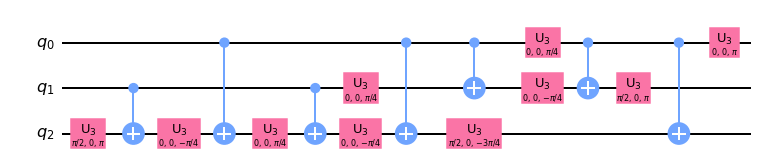

In [52]:
qc = QuantumCircuit(3)
qc.mct([0, 1], 2)
qc.cx(0, 2)
qc.h(1)
qc.z(0)

trans = transpile(qc, basis_gates = ["u3", "cx", 's'])
trans.draw("mpl")

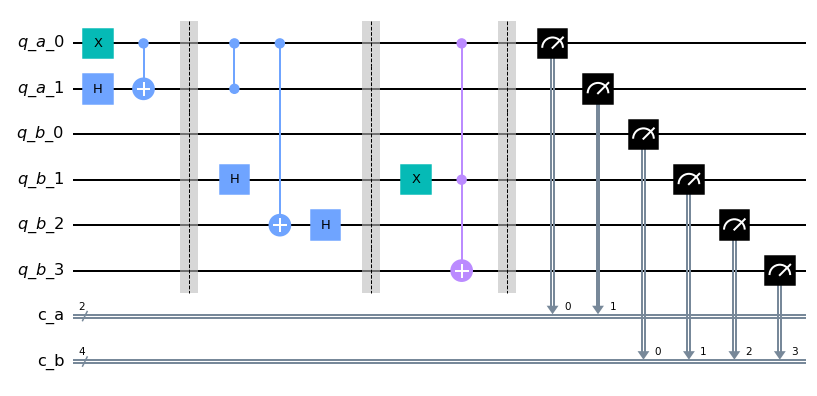

In [53]:
# Advanced Circuit Visuals
q_a = QuantumRegister(2, "q_a")
q_b = QuantumRegister(4, "q_b")
c_a = ClassicalRegister(2, "c_a")
c_b = ClassicalRegister(4, "c_b")

qc = QuantumCircuit(q_a, q_b, c_a, c_b)
qc.x(0)
qc.h(1)
qc.cx(0,1)
qc.barrier()
qc.cz(0,1)
qc.cx(0,4)
qc.h(3)
qc.h(4)
qc.barrier()
qc.x(3)
qc.ccx(0,3,5)
qc.barrier()
qc.measure(q_a, c_a)
qc.measure(q_b, c_b)
qc.draw("mpl")


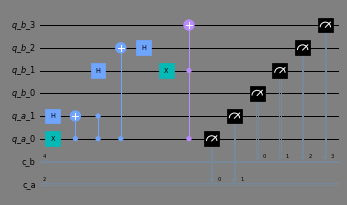

In [54]:
#Now look at all the crazy things we can do with the .draw() method! Who would've imagined!
qc.draw("mpl", reverse_bits=True, plot_barriers=False,scale=0.5, style = {'backgroundcolor': 'gray'})

In [55]:
from qiskit.tools.visualization import circuit_drawer
circuit_drawer(qc, output='text') #oh and yeah, there is this, circuit_drawer- something to keep in mind!

┌───┐      ░                 ░            ░ ┌─┐               
q_a_0: ┤ X ├──■───░───■────■────────░────────■───░─┤M├───────────────
       ├───┤┌─┴─┐ ░   │    │        ░        │   ░ └╥┘┌─┐            
q_a_1: ┤ H ├┤ X ├─░───■────┼────────░────────┼───░──╫─┤M├────────────
       └───┘└───┘ ░        │        ░        │   ░  ║ └╥┘┌─┐         
q_b_0: ───────────░────────┼────────░────────┼───░──╫──╫─┤M├─────────
                  ░ ┌───┐  │        ░ ┌───┐  │   ░  ║  ║ └╥┘┌─┐      
q_b_1: ───────────░─┤ H ├──┼────────░─┤ X ├──■───░──╫──╫──╫─┤M├──────
                  ░ └───┘┌─┴─┐┌───┐ ░ └───┘  │   ░  ║  ║  ║ └╥┘┌─┐   
q_b_2: ───────────░──────┤ X ├┤ H ├─░────────┼───░──╫──╫──╫──╫─┤M├───
                  ░      └───┘└───┘ ░      ┌─┴─┐ ░  ║  ║  ║  ║ └╥┘┌─┐
q_b_3: ───────────░─────────────────░──────┤ X ├─░──╫──╫──╫──╫──╫─┤M├
                  ░                 ░      └───┘ ░  ║  ║  ║  ║  ║ └╥┘
c_a: 2/═════════════════════════════════════════════╩══╩══╬══╬══╬══╬═
                                                    0  1  ║  ║  ║  ║ 
                                                          ║  ║  ║  ║ 
c_b: 4/═══════════════════════════════════════════════════╩══╩══╩══╩═
                                                          0  1  2  3

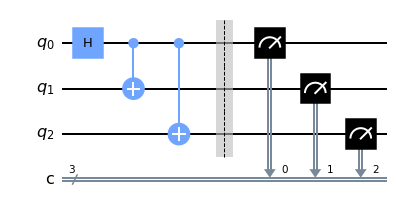

In [56]:
# exporting to QASM
qc = QuantumCircuit(3, 3)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.barrier()
qc.measure([0, 1, 2], [0, 1, 2])
qc.draw("mpl")

In [57]:
# returns a qasm string REALLY SIMPLE
qasm_str = qc.qasm()
qasm_str

'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[3];\ncreg c[3];\nh q[0];\ncx q[0],q[1];\ncx q[0],q[2];\nbarrier q[0],q[1],q[2];\nmeasure q[0] -> c[0];\nmeasure q[1] -> c[1];\nmeasure q[2] -> c[2];\n'

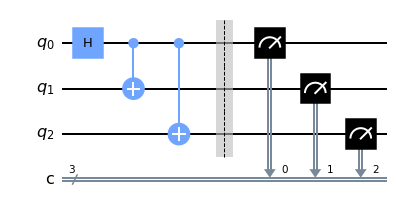

In [58]:
circ = QuantumCircuit.from_qasm_str(qasm_str)
circ.draw("mpl")

In [59]:
# info about the real machines
import qiskit.tools.jupyter
%qiskit_backend_overview

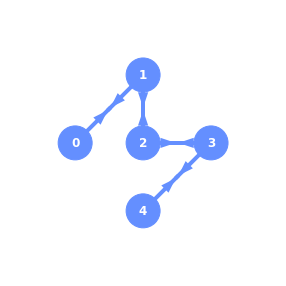

In [60]:
# checking connectivity
from qiskit.visualization import plot_gate_map
backend = provider.get_backend("ibmq_manila")
plot_gate_map(backend, plot_directed = True)

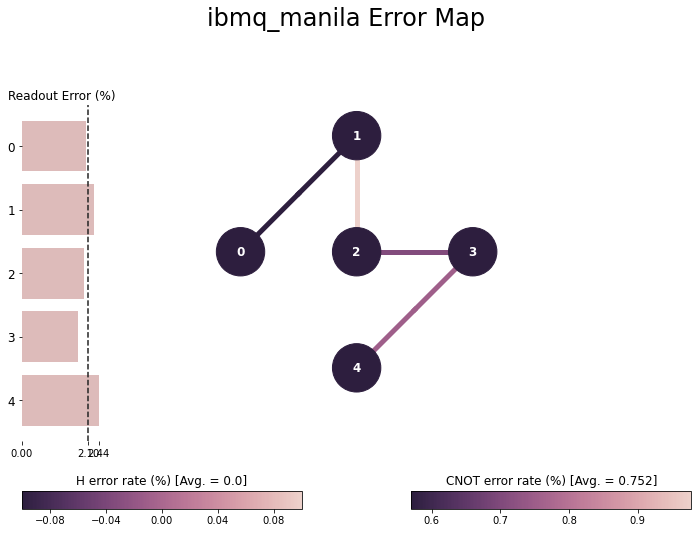

In [61]:
plot_error_map(backend)

In [62]:
qc = QuantumCircuit(3)
qc.measure_all()
sim = BasicAer.get_backend("qasm_simulator")
# speciofy som linear connection
couple_map = [[0, 1], [1, 2]]
job = execute(qc, sim, shots = 1000, coupling_map = couple_map)
result = job.result()
counts = result.get_counts()
print(counts)

{'000': 1000}
